# Linear Regression Model on Diabetes

### Load The Diabetes Dataset

#### Import Library

In [1]:
from sklearn import datasets

### Load Dataset

In [2]:
diabetes = datasets.load_diabetes()

### Description of Data

In [3]:
#JSON format: data(x variable), target(y variable), DESCR, feature names
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
#first 10 variables are the x variables, the 11th column is the y variable that we will predict
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### Feature Names

In [5]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Create X and Y Data Matrices

In [6]:
X = diabetes.data
Y = diabetes.target

### Data Dimensions

In [7]:
X.shape, Y.shape

((442, 10), (442,))

## Data Split

### Import Library

In [8]:
from sklearn.model_selection import train_test_split

### Perform 80/20 Data Split

80 going to training set, 20 going to testing set

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Data Dimensions

In [10]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [11]:
X_test.shape, Y_test.shape

((89, 10), (89,))

## Linear Regression Model

### Import Library

In [12]:
 from sklearn import linear_model #this allows us to build the linear regression model
from sklearn.metrics import mean_squared_error, r2_score #this allows us to compute the performance of the model

### Build Linear Regression

#### Define the Regression Model

In [13]:
model = linear_model.LinearRegression()

#### Build Training Model

In [14]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply Trained Model
Utilize the trained model to make a prediction on the test set

In [15]:
Y_pred = model.predict(X_test)

## Prediction Results

### Print Model Performance

In [16]:
print('Coefficients:', model.coef_, '\n')
print('Intercept:', model.intercept_, '\n')
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_pred), '\n')
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred), '\n')

Coefficients: [  32.81332186 -249.68230223  583.50944068  307.06886878 -835.06796549
  423.37623427  128.5295631   207.6049948   704.73717905   66.48713474] 

Intercept: 150.9852756729121 

Mean squared error (MSE): 3282.84 

Coefficient of determination (R^2): 0.36 



In [17]:
print(diabetes.feature_names)
#the coefficients in the above cell are the respective coefficients for the feature names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


#### String Formatting Practice
By default r2 returns a float

In [18]:
score = r2_score(Y_test, Y_pred)
#The modulo operator can round numbers to the desired decimal place
print(score)
print('%f' % score)
print('%.3f' % score)
print('%.2f' % score)

0.3632465793285282
0.363247
0.363
0.36


### Scatter Plots

#### Import Library

In [19]:
import seaborn as sns

### Make Scatter Plot

First let's take a look at the data

In [20]:
Y_test

array([ 44., 172., 190., 122.,  59., 115., 116.,  85., 124.,  49., 168.,
       153.,  87., 164.,  70., 230.,  55., 102., 131., 311., 122.,  55.,
       170., 302., 200.,  71., 128., 168.,  53., 249.,  84., 151.,  95.,
       185.,  98.,  65., 143.,  42., 190.,  74., 332., 127., 210., 198.,
       252., 191., 178., 216., 233.,  48.,  54.,  90., 155.,  90., 160.,
        60., 253., 241., 259., 220., 292., 137., 275., 217.,  90., 202.,
       232.,  65., 154.,  97., 136., 214.,  84., 258., 121., 174.,  52.,
       141., 206., 104., 144., 102., 125., 220., 196.,  77., 100., 140.,
        39.])

In [21]:
Y_pred

array([128.07328678, 143.79204107, 143.26267524, 183.55881314,
       128.13233748, 134.20248264, 131.83707002,  57.85400929,
       130.9304904 , 131.92222526, 144.32017505, 115.15372087,
        89.41908975, 185.48920563, 181.79849898, 134.13241899,
        81.5720152 ,  86.11582499, 156.12232444, 172.99589997,
       166.41758977,  75.37572542, 127.40957285, 145.70053035,
       157.76124117,  87.47236037,  93.05361729, 122.7213088 ,
        96.63274427, 202.35586388,  91.29772456, 171.0164893 ,
       159.38821692, 162.09125949,  85.71401431,  58.21220287,
       171.37623315, 123.74489833, 163.00764906, 125.73835178,
       223.19933411, 123.11988683, 155.78077605, 156.32600584,
       151.64021773, 123.08456234, 191.42712047, 167.72963907,
       253.62848134,  73.01445408,  90.49635198, 152.68244027,
       221.7321687 , 135.60442392, 116.56247114,  84.47847777,
       111.4679058 , 182.61200906, 152.09101947, 208.13430507,
       191.16205534,  96.72171456, 221.96325682, 216.40

Use the seaborn package to make the scatter plots

C:\Users\uuhns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

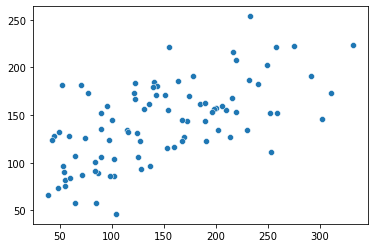

In [22]:
sns.scatterplot(Y_test, Y_pred)

C:\Users\uuhns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

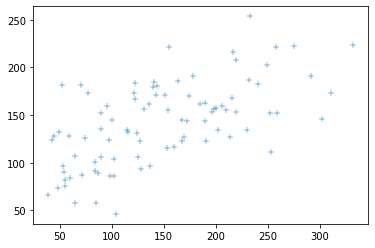

In [24]:
sns.scatterplot(Y_test, Y_pred, marker='+')
#can modify the marker

To be able to view data density more clearly, change alpha to less than 1 (increase transparency)

C:\Users\uuhns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

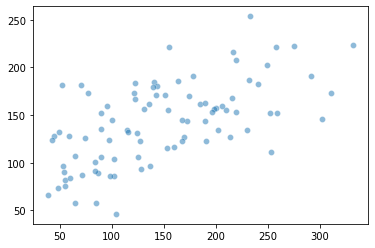

In [26]:
sns.scatterplot(Y_test, Y_pred, alpha=.5)